In [1]:
def liczby_catalana(n=1):
    '''
    Funkcja zwraca listę n+1 liczb Catalana

    Argumenty:
    n (int) - ilość liczb Catalana (domyślnie 1)
    '''
    wynik = [1]
    for _ in range(1, n+1):
        nowy = []
        for i in range(len(wynik)):
            nowy.append(wynik[i]*wynik[len(wynik)-1-i])
        wynik.append(sum(nowy))
    return wynik

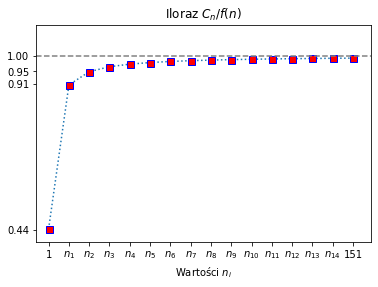

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def f(n):
    '''
    Funkcja zwraca przybliżenie Stirlinga dla liczb 
    Catalana.

    Argumenty:
    n (int) - numer liczby Catalana
    '''
    wynik = (4**n)/(n**(3/2)*np.sqrt(np.pi))
    return wynik


t = [10*i+1 for i in range(16)]
x = np.array([liczby_catalana(x)[-1]/f(x) for x in t])
x_label = [f'$n_{{{i+1}}}$' for i in range(15)]
x_label.insert(0, '1')
x_label.insert(-1, '151')

ytic = [round(x[0], 2), 1]
roznica = abs(x[1:]-x[:-1])
for i in range(len(roznica)):
    if roznica[i] > 0.04:
        ytic.insert(-1, round(x[i+1], 2))

plt.plot(t, x, marker='s', markerfacecolor='r',
         markeredgecolor='b', markersize=7, linestyle=':')
plt.axhline(y=1, linestyle='--', color='gray')
plt.xlim(-5, 160)
plt.ylim(0.4, 1.1)
plt.yticks(ytic)
plt.xticks(t, x_label)
plt.title('Iloraz $C_n/f(n)$')
plt.xlabel('Wartości $n_i$')
plt.show()

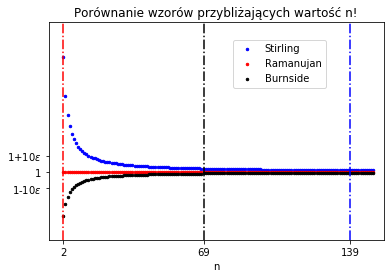

In [3]:
import math


def S(n):
    '''
    Funkcja zwraca przybliżenie Stirlinga dla n!

    Argumenty:
    n (int) - stopień silni
    '''
    wynik = np.sqrt(2*np.pi*n)*((n/np.e)**n)
    return wynik


def R(n):
    '''
    Funkcja zwraca przybliżenie Ramanujana dla n!

    Argumenty:
    n (int) - stopień silni
    '''
    wynik = np.sqrt(np.pi)*(n/np.e)**n*(8*n**3 + 4*n**2 + n + 1/30)**(1/6)
    return wynik


def B(n):
    '''
    Funkcja zwraca przybliżenie Burnside'a dla n!

    Argumenty:
    n (int) - stopień silni
    '''
    wynik = np.sqrt(2*np.pi)*(((n+0.5)/np.e)**(n+0.5))
    return wynik


t = [i for i in range(2, 151)]
S = np.array([math.factorial(x)/S(x) for x in t])
R = np.array([math.factorial(x)/R(x) for x in t])
B = np.array([math.factorial(x)/B(x) for x in t])

s = len([x for x in abs(S-1) if x > 0.0006])+2  # obliczenia kiedy przybliżenie
r = len([x for x in abs(R-1) if x > 0.0006])+2  # jest z dokładnością do
b = len([x for x in abs(B-1) if x > 0.0006])+2  # epsilon = 0.0006

plt.scatter(t, S, color='b', s=6, label='Stirling')
plt.scatter(t, R, color='r', s=6, label='Ramanujan')
plt.scatter(t, B, color='black', s=6, label='Burnside')
plt.axvline(r, linestyle='-.', color='r')
plt.axvline(b, linestyle='-.', color='black')
plt.axvline(s, linestyle='-.', color='b')
plt.xlim(-5, 155)
plt.ylim(0.975, 1.055)
plt.yticks([0.994, 1, 1.006], ['1-10$\epsilon$', '1', '1+10$\epsilon$'])
plt.xticks([s, r, b])
plt.title('Porównanie wzorów przybliżających wartość n!')
plt.xlabel('n')
plt.legend(loc=[0.55, 0.7])
plt.show()